In [1]:
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
# catboost:y.shape=(num, )
y_train.shape

(2250,)

In [4]:
eval_set = [(X_train, y_train),
            (X_test, y_test)]
cat = CatBoostClassifier(thread_count=-1, verbose=False, allow_writing_files=False, random_state=2)
cat.fit(X_train, y_train,
        eval_set=eval_set,  # ==>xgboost
        early_stopping_rounds=100)  # ==>xgboost

result = cat.predict(X_test)
result

array([[2],
       [5],
       [7],
       [2],
       [1],
       [2],
       [3],
       [5],
       [6],
       [7],
       [6],
       [1],
       [2],
       [5],
       [2],
       [3],
       [3],
       [5],
       [2],
       [5],
       [2],
       [2],
       [5],
       [5],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [5],
       [1],
       [5],
       [5],
       [6],
       [2],
       [1],
       [5],
       [6],
       [1],
       [7],
       [3],
       [5],
       [4],
       [6],
       [6],
       [5],
       [3],
       [2],
       [3],
       [1],
       [2],
       [2],
       [5],
       [2],
       [1],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [5],
       [5],
       [3],
       [5],
       [5],
       [5],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [5],
       [6],
       [2],
       [6],
    

In [5]:
# catboost:predict_result.shape=(num, 1)
result.shape

(750, 1)

In [6]:
# 预测结果可以输出为概率向量
result_pro = cat.predict_proba(X_test) # 仅分类算法
result_pro

array([[4.93966177e-02, 8.37953243e-01, 4.40825709e-04, ...,
        1.06333109e-01, 5.16109564e-03, 3.33950918e-04],
       [3.40299884e-01, 1.77506645e-01, 1.77943036e-05, ...,
        4.81618584e-01, 3.86477624e-05, 4.81863958e-04],
       [4.14947090e-01, 2.38112009e-02, 1.30655935e-04, ...,
        5.51244610e-04, 2.90283440e-05, 5.60501805e-01],
       ...,
       [6.16085432e-02, 2.28237622e-01, 1.86114937e-05, ...,
        7.09813095e-01, 1.34734587e-05, 2.90251907e-04],
       [2.00024357e-02, 8.32625543e-01, 9.71643168e-05, ...,
        1.47016682e-01, 1.59680999e-04, 3.71230158e-05],
       [2.70129116e-04, 1.34632844e-03, 1.35575593e-04, ...,
        9.96373875e-01, 1.06690733e-03, 8.81057253e-06]])

In [7]:
result_pro.shape

(750, 7)

In [8]:
cat.score(X_test, y_test)  # 精度

0.8506666666666667

In [9]:
cat.feature_importances_  # 特征的相对重要性

array([1.93651490e+01, 4.31433989e+00, 3.06926803e+00, 7.56999943e+00,
       6.22734979e+00, 1.23919638e+01, 5.57067121e+00, 4.71445759e+00,
       3.87196038e+00, 1.27212523e+01, 4.41022409e+00, 0.00000000e+00,
       1.86552502e+00, 9.07355160e+00, 1.90933020e-01, 6.58312117e-02,
       1.46500151e-02, 2.00422302e-02, 5.98266724e-02, 2.99614164e-02,
       0.00000000e+00, 0.00000000e+00, 1.83633350e-03, 3.35916256e-01,
       2.04371161e-02, 4.30507582e-01, 8.08186668e-02, 4.86576484e-04,
       0.00000000e+00, 5.28169920e-02, 1.63274099e-02, 1.03188649e-01,
       6.15265943e-03, 2.77494714e-01, 0.00000000e+00, 7.70844780e-02,
       5.39811867e-01, 4.21617698e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.45093376e-05, 1.22439426e+00, 1.12373759e+00,
       2.40454117e-02, 8.50290417e-03, 5.70492479e-02, 2.16463700e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80936628e-02,
       0.00000000e+00, 0.00000000e+00])

In [10]:
'''
Return the feature importances as a list of the following pairs sorted by feature importance:
(feature_id, feature importance)
'''
cat.get_feature_importance(prettified=True)  # 默认prettified=False

,Feature Id,Importances
0,0,19.365149
1,9,12.721252
2,5,12.391964
3,13,9.073552
4,3,7.569999
5,4,6.227350
6,6,5.570671
7,7,4.714458
8,10,4.410224
9,1,4.314340


In [11]:
evals_result = cat.evals_result_  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'learn': {'MultiClass': [1.7188651390411431,
   1.561258053109982,
   1.4346420461107015,
   1.355844320290275,
   1.274338185822448,
   1.210506800286013,
   1.1507161421684733,
   1.0998891614270776,
   1.0511278309403556,
   1.0108577422056326,
   0.971140187660462,
   0.9380490195846056,
   0.903438503259226,
   0.8717631657910265,
   0.8496702773973087,
   0.826190179116795,
   0.8085237501504619,
   0.7909219212925954,
   0.7725745269243688,
   0.7569451154878439,
   0.7417860501397816,
   0.7279160132941724,
   0.7145432293304949,
   0.7001774813048218,
   0.6880446323087424,
   0.6765310276019427,
   0.6647529729884442,
   0.6550056198033147,
   0.6457478202187052,
   0.6353257633577676,
   0.6279592522081664,
   0.6196592561731618,
   0.6136984674032462,
   0.6053844026367102,
   0.6000762633868767,
   0.5933046469704174,
   0.5868476567047195,
   0.5791082911118082,
   0.5734302185144852,
   0.5691690351031887,
   0.5621914097088163,
   0.555955940240051,
   0.55125877725574

In [12]:
# 第一个为训练数据集的评估结果
# 后面(第二个开始)根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result.keys()

dict_keys(['learn', 'validation_0', 'validation_1'])

In [13]:
train_evals = evals_result['validation_0']['MultiClass']
test_evals = evals_result['validation_1']['MultiClass']

Text(0.5, 0, 'rounds')

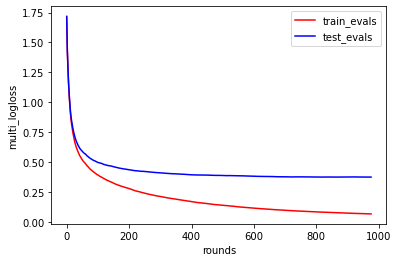

In [14]:
plt.plot(train_evals, label='train_evals', color='red')
plt.plot(test_evals, label='test_evals', color='b')
plt.legend()
plt.ylabel('multi_logloss')
plt.xlabel('rounds')


